# Programación lineal

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="400px" height="125px" />

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/220px-3dpoly.svg.png" width="350px" height="125px" />


**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html
- http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf 

## 1. Apuntes históricos

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="200px" height="125px" />


- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Simplex-description-en.svg/240px-Simplex-description-en.svg.png" width="200px" height="125px" />

 $$ y \geq 3x + 4 $$

## 2. Problemas de programación lineal

### 2.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto debe de tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

#### Solución

Sean:
- $x_A$: la cantidad de gramos de A a ser producidas, y
- $x_B$: la cantidad de gramos de B a ser producidas en la semana.

Notar que lo que se quiere es minimizar $0.6x_A+0.2x_B = costo$.

Restricciones:
1. El compuesto debe tener **al menos** $25 g$ de proteína: $30\%x_A+5\%x_B\geq 25 \Rightarrow 0.3x_A+0.05x_B\geq 25$.
2. El compuesto debe tener **al menos** $6 g$ de grasa: $1\%x_A+7\%x_B\geq 6 \Rightarrow 0.01x_A+0.07x_B\geq 6$.
3. El compuesto debe tener **al menos** $30 g$ de azúcares: $10\%x_A+10\%x_B\geq 30 \Rightarrow 0.1x_A+0.1x_B\geq 30$.

Finalmente, el problema puede ser expresado en la forma explicada como:
\begin{equation}
\begin{array}{ll}
\min_{x_A,x_B} & 0.6x_A+0.2x_B \\
\text{s. a. }  & -0.3x_A-0.05x_B\leq -25 \\
               & -0.01x_A-0.07x_B\leq -6 \\
               & -0.1x_A-0.1x_B\leq -30,
\end{array}
\end{equation}

o, eqivalentemente 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^\top\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
con
- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.
- $\boldsymbol{x}=\left[x_A \quad x_B\right]^\top$.


Preferiremos, en adelante, la notación vectorial/matricial.

Solución gráfica:

### Primera restricción

$$ -0.3 x_A - 0.05 x_B = - 25 $$

$$ -0.3 x_A = -25 + 0.05 x_B $$

$$ 25 - 0.3 x_A = 0.05 x_B $$

$$ x_B = \frac{25 - 0.3 x_A}{0.05} $$

$\frac{arriba}{abajo}$

### Segunda restricción

$$ -0.01 x_A- 0.07 x_B = -6 $$

$$ x_B = \frac{6 - 0.01 x_A}{0.07} $$

## Tercera restricción

$$ -0.1 x_A- 0.1 x_B = -30 $$

$$ x_B = \frac{30 - 0.1 x_A}{0.1} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
xA = np.linspace(start=-1,
                 stop=300,
                 num=5000)

def r1(xA) : # proteína
    xB = (25 - 0.3*xA)/0.05
    return xB

def r2(xA) : # grasa
    xB = (6 - 0.01*xA)/0.07
    return xB

def r3(xA) : # azúcar
    xB = (30 - 0.1*xA)/0.1
    return xB

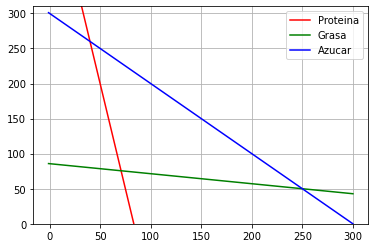

In [8]:
plt.figure()
plt.plot(xA, r1(xA), "r", label="Proteina")
plt.plot(xA, r2(xA), "g", label="Grasa")
plt.plot(xA, r3(xA), "b", label="Azucar")
plt.legend(loc="best")
plt.ylim([0, 310])
plt.grid()

3 ecuaciones y 2 incógnitas. 3 soluciones.

$$ \frac{25 - 0.3 x_A}{0.05} = \frac{30 - 0.1 x_A}{0.1} $$


$$ \frac{25 - 0.3 x_A}{0.05} - \frac{30 - 0.1 x_A}{0.1} = 0 $$


In [15]:
import sympy as sp
x = sp.var("x")
ecuacion = r1(x) - r3(x)
ecuacion

200.0 - 5.0*x

In [17]:
sp.solve(ecuacion, x)

[40.0000000000000]

In [18]:
ecuacion = r2(x) - r3(x)
ecuacion

0.857142857142857*x - 214.285714285714

In [19]:
sp.solve(ecuacion, x)

[250.000000000000]

In [20]:
ecuacion = r1(x) - r2(x)
sp.solve(ecuacion, x)

[70.7317073170731]

In [26]:
soluciones_A = np.array([40, 250, 70.731])
r1(soluciones_A)

array([  260.   , -1000.   ,    75.614])

In [27]:
r2(soluciones_A)

array([80.        , 50.        , 75.60985714])

In [28]:
r3(soluciones_A)

array([260.   ,  50.   , 229.269])

In [30]:
xA1 = 40
xA2 = 250
xA3 = 70.731

xB1 = 260
xB2 = 50
xB3 = 75.61

In [23]:
def costo(xA, xB) :
    return 0.6*xA + 0.2*xB

In [24]:
costo(xA1, xB1)

76.0

In [31]:
costo(xA2, xB2)

160.0

In [32]:
costo(xA3, xB3) ###
###
###
###
###
###
###
###
###
###
###
###
###
###

57.560599999999994

### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves. 

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche. 

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias? 

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

**Pasos a seguir

1. Identificar el criterio de optimización
> Maximizar las ganancias
2. Identificar la información que nos permita escribir la función objetivo
> Por cada carrocería de camión se obtienen 600. 
>
> Por cada carrocería de automóvil se obtienen 200.
3. Definir variables de optimización
> $x_C$: carrocería de camión
>
> $x_A$: carrocería de auto

Entonces nuestra función objetivo es:
$$ Ganancia = 600 x_C + 200 x_A $$

$$ \max{600 x_C + 200 x_A} \equiv \min{-600 x_C - 200 x_A}$$

4. Escribir el resto de la información en función de las variables. I.e. identificar las restricciones.
> Nave A: $ 7 x_C + 2 x_A \leq 300 $
>
> Nave B: $ 3 x_C + 3 x_A \leq 270 $


### Restricción de Nave A

$$ 7 x_C + 2 x_A = 300 $$

$$ 2 x_A = 300 - 7 x_C $$

$$ x_A = \frac{300 - 7 x_C}{2} $$

In [33]:
def rA(xC) :
    xA = (300 - 7*xC)/2
    return xA

def rB(xC) :
    xA = (270 - 3*xC)/3
    return xA

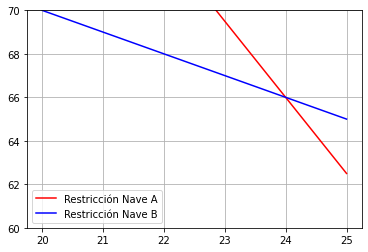

In [49]:
xC = np.linspace(20, 25, 5000)
plt.figure()
plt.plot(xC, rA(xC), "r", label="Restricción Nave A")
plt.plot(xC, rB(xC), "b", label="Restricción Nave B")
plt.legend(loc="best")
plt.ylim([60, 70])
plt.grid()

In [37]:
sp.solve(rA(x) - rB(x), x)

[24]

In [40]:
rA(24)

66.0

In [41]:
rB(24)

66.0

In [42]:
def ganancia(xC, xA) :
    return 600*xC + 200*xA
ganancia(24, 66)

27600

La ganancia óptima se consigue fabricando 66 carrocerías de automóvil y 24 carrocerías de camión.

---


#### Bueno, y una vez planteado, ¿cómo se resuelve el problema?



Este problema está sencillo pues solo es en dos variables. La solución gráfica es válida.

Resolviendo el problema 2 (Maximización de utilidad en carros y camiones), con la función `linprog`

## 3. ¿Cómo se resuelve en python?

### 3.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/_static/images/scipy_med.png" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería. 

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

In [2]:
import scipy.optimize as opt

# Importar el módulo optimize de la librería scipy

El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices. Entre ellas se encuentra la función `linprog`

---

In [14]:
opt.linprog?

In [4]:
import numpy as np

In [12]:
c = np.array([-600, -200])
A = np.array([[7, 2], [3, 3]])
b = np.array([300, 270])

opt.linprog(c, A, b)

     con: array([], dtype=float64)
     fun: -27599.999999550844
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([4.84840257e-09, 4.59630201e-09])
  status: 0
 success: True
       x: array([24., 66.])

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudihambre, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es $\$15$ en cada par de aretes y $\$20$ en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

**Diez minutos: quien primero lo haga, comparte pantalla para explicarlo y le subiré la nota de alguna tarea a 100.**

Queremos maximizar ganancias = $15 a + 20 c$

= $min -15 a - 20 c $

Restricción 1: Tiempo

$0.5 a + 1 c \leq 10$

Restricción 2: Material para unidades

$ a + c \leq 15 $


In [18]:
vector_de_ecuacion_de_optimizacion = np.array([-15, -20]) # c
matriz_de_coeficientes_de_restricciones = np.array([[0.5, 1], [1, 1]]) # A
valores_de_restricciones = np.array([10, 15]) # b
opt.linprog(vector_de_ecuacion_de_optimizacion, matriz_de_coeficientes_de_restricciones, valores_de_restricciones)

     con: array([], dtype=float64)
     fun: -249.99999964496874
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([1.37653036e-08, 2.17378222e-08])
  status: 0
 success: True
       x: array([9.99999998, 4.99999999])

In [15]:
opt.linprog?

### 3.2 Solución del ejemplo básico con linprog
Ya hicimos la solución gráfica. Contrastemos con la solución que nos da `linprog`

- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.

In [19]:
c = np.array([0.6, 0.2])
A = np.array([[-0.3, -0.05], [-0.01, -0.07], [-0.1, -0.1]])
b = np.array([-25, -6, -30])
opt.linprog(c, A, b)

     con: array([], dtype=float64)
     fun: 76.00000000328902
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([9.16756449e-10, 1.26000000e+01, 1.51850443e-09])
  status: 0
 success: True
       x: array([ 40.        , 260.00000001])

## 4. Problema de transporte 1
- **Referencia**: http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

Una  empresa tiene dos fábricas A y B.  En ellas  se fabrica un determinado  producto, a razón de 500  y 400 unidades por día respectivamente.  El producto  ha  de  ser distribuido posteriormente  a  tres  centros  C,  D  y  E,  que  requieren,  respectivamente,  200,  300  y  400  unidades.  Los  costos  de  transportar cada unidad del producto desde cada fábrica a cada centro distribuidor son los  indicados  en la tabla  siguiente: 

Factoría|C|D|E|Fabricación (Unidades)
:----|----|----|----|----
A|  50 u.m|60 u.m|10 u.m|500 u
B|  25 u.m|40 u.m|20 u.m|400 u
Demanda|200|300|400|

**¿De qué manera  deben  organizar  el transporte a fin de que los gastos sean mínimos?**


Formulemos el problema para ser resuelto por la programación lineal con
- $x_1$: unidades transportadas de la factoría "A" al centro "C"
- $x_2$: unidades transportadas de la factoría "A" al centro "D"
- $x_3$: unidades transportadas de la factoría "A" al centro "E"
- $x_4$: unidades transportadas de la factoría "B" al centro "C"
- $x_5$: unidades transportadas de la factoría "B" al centro "D"
- $x_6$: unidades transportadas de la factoría "B" al centro "E"

se tienen las siguientes ecuaciones:

Restricciones de la producción:

- $x_{AC} + x_{AD} + x_{AE} \leq 500$
- $x_{BC} + x_{BD} + x_{BE} \leq 400$

Restricciones del consumo:

- $x_{AC} + x_{BC} \geq 200$
- $x_{AD} + x_{BD} \geq 300$
- $x_{AE} + x_{BE} \geq 400$

La función objetivo será:

$$\min_{x_1,\dots,x_6}50x_{AC} + 60x_{AD} + 10x_{AE} + 25x_{BC} + 40x_{BD} + 20x_{BE}$$

Resolver con `linprog`

In [10]:
import numpy as np
import scipy.optimize as opt

C = np.array([50, 60, 10, 25, 40, 20])
A = np.array([[1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1], [-1, 0, 0, -1, 0, 0], [0, -1, 0, 0, -1, 0], [0, 0, -1, 0, 0, -1]])
b = np.array([500, 400, -200, -300, -400])

respuesta = opt.linprog(C, A, b, method="simplex")
respuesta

     con: array([], dtype=float64)
     fun: 23000.0
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([0., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([  0., 100., 400., 200., 200.,   0.])

In [11]:
respuesta.x

array([  0., 100., 400., 200., 200.,   0.])

## 5. Optimización de inversión en bonos

**Referencia:**

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gukxBus8lOs')

El objetivo de este problema es determinar la mejor estrategia de inversión, dados diferentes tipos de bono, la máxima cantidad que puede ser invertida en cada bono, el porcentaje de retorno y los años de madurez. También hay una cantidad fija de dinero disponible ($\$750,000$). Por lo menos la mitad de este dinero debe ser invertido en bonos con 10 años o más para la madurez. Se puede invertir un máximo del $25\%$ de esta cantidad en cada bono. Finalmente, hay otra restricción que no permite usar más de $35\%$ en bonos de alto riesgo.

Existen seis (6) opciones de inversión con las letras correspondientes $A_i$

1. $A_1$:(Tasa de retorno=$8.65\%$; Años para la madurez=11, Riesgo=Bajo)
1. $A_2$:(Tasa de retorno=$9.50\%$; Años para la madurez=10, Riesgo=Alto)
1. $A_3$:(Tasa de retorno=$10.00\%$; Años para la madurez=6, Riesgo=Alto)
1. $A_4$:(Tasa de retorno=$8.75\%$; Años para la madurez=10, Riesgo=Bajo)
1. $A_5$:(Tasa de retorno=$9.25\%$; Años para la madurez=7, Riesgo=Alto)
1. $A_6$:(Tasa de retorno=$9.00\%$; Años para la madurez=13, Riesgo=Bajo)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

Este problema puede ser resuelto con programación lineal. Formalmente, puede ser descrito como:

$$\max_{A_1,A_2,...,A_6}\sum^{6}_{i=1} A_iR_i, = \min_{A_1,A_2,...,A_6}-\sum^{6}_{i=1} A_iR_i,$$

donde $A_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.

$$ objetivo = \max_{A_1, A_2, A_3, A_4, A_5, A_6} ( 0.0865 A_1 + 0.095 A_2 + 0.1 A_3 + 0.0875 A_4 + 0.0925 A_5 + 0.09 A_6)$$

100 --> 1

5% --> una fracción donde el 5 está en el numerador y el 100 está en el denominador

In [6]:
import numpy as np
import scipy.optimize as opt

# coeficientes de función objetivo
C = np.array([-0.0865,
              -0.0950,
              -0.1000,
              -0.0875,
              -0.0925,
              -0.0900])

# valores de acotamiento de restricciones
b = np.array([750000,
              -375000,
              187500,
              187500,
              187500,
              187500,
              187500,
              187500,
              262500])

# coeficientes de restricciones
A = np.array([[ 1, 1, 1, 1, 1, 1],
              [-1,-1, 0,-1, 0,-1],
              [ 1, 0, 0, 0, 0, 0],
              [ 0, 1, 0, 0, 0, 0],
              [ 0, 0, 1, 0, 0, 0],
              [ 0, 0, 0, 1, 0, 0],
              [ 0, 0, 0, 0, 1, 0],
              [ 0, 0, 0, 0, 0, 1],
              [ 0, 1, 1, 0, 1, 0]])

respuesta = opt.linprog(C, A, b)
respuesta

     con: array([], dtype=float64)
     fun: -68887.49999256016
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([4.34917165e-05, 1.87500000e+05, 7.49999997e+04, 1.12500000e+05,
       3.19572428e-04, 2.36913911e-05, 1.87500000e+05, 2.06607889e-04,
       8.75809928e-05])
  status: 0
 success: True
       x: array([1.1250000e+05, 7.5000000e+04, 1.8750000e+05, 1.8750000e+05,
       2.3547362e-04, 1.8750000e+05])

In [7]:
respuesta.x

array([1.1250000e+05, 7.5000000e+04, 1.8750000e+05, 1.8750000e+05,
       2.3547362e-04, 1.8750000e+05])